In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import naive_bayes
from collections import Counter
import numpy as np

### Instagram Information

In [3]:
# Load Instagram information from CSV into a DataFrame
instagram_data = pd.read_csv('datasets/instagram_all.csv')

In [4]:
instagram_data = instagram_data.drop(columns=['Comments on Others (4)', 'Comments on post (1)'])
instagram_data.dtypes

Unnamed: 0                              int64
Start Date                             object
End Date                               object
Instagram_handle                       object
Name                                   object
no_of_posts                             int64
story_posted                            int64
picture_description                    object
post_captions                          object
post_hastags                           object
post_tag_by_you                         int64
post_tag_to_you                         int64
your_followers                          int64
you_following                           int64
interaction_with_your_friends           int64
your_close_friends                      int64
interaction_with_your_close_friends     int64
all_comments_by_you                    object
all_comments_to_you                    object
BY_score                               object
TO_score                               object
description_score                 

In [5]:
instagram_data['Start Date'] = pd.to_datetime(instagram_data['Start Date'])
instagram_data['End Date'] = pd.to_datetime(instagram_data['End Date'])

In [6]:
instagram_data = instagram_data.sort_values(by='Start Date', ascending=False)
instagram_data

,Unnamed: 0,Start Date,End Date,Instagram_handle,Name,no_of_posts,story_posted,picture_description,post_captions,post_hastags,...,interaction_with_your_friends,your_close_friends,interaction_with_your_close_friends,all_comments_by_you,all_comments_to_you,BY_score,TO_score,description_score,caption_Score,story_views
97,97,2034-12-10,2035-01-05,art_enthusiast,Nova Thompson,45,6,"Artistic creations, Creative expressions, Visu...","Creative expressions, Visual arts, Art history...","art, creations, visual arts, history, exhibiti...",...,1950,650,1880,['You have such a warm and loving spirit. Keep...,['Your compassion and empathy are truly commen...,"[0.8908, 0, 0, 0, 0, 0, 0, 0, 0]","[0.7345, -0.7818, 0.5972, -0.7548, 0.8645, 0, ...","[0.3818, 0.4404, 0.0, 0.0, 0.0, 0.4767]","[0.4404, 0.0, 0.0, 0.0, 0.4767, 0.3818]",10026
96,96,2034-11-10,2034-12-05,pet_lover,Zara Martinez,46,7,"Adorable pets, Pet adoption, Animal welfare, P...","Pet adoption, Animal welfare, Pet care tips, P...","pets, pet adoption, animal welfare, pet care, ...",...,1900,633,1840,"['Your content always brightens my day!', 'Thi...","['This is disappointing. You can do better.', ...","[0.4199, 0.8883, 0.5562, -0.7708, 0.8707, 0.81...","[-0.0772, -0.1161, 0.8883, -0.7818, -0.1161, 0...","[0.4939, 0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767]","[0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767, 0.4939]",6564
95,95,2034-10-10,2034-11-05,fitness_fanatic,Eliana Johnson,47,8,"Workout routines, Fitness motivation, Healthy ...","Fitness motivation, Healthy lifestyle, Strengt...","fitness, workout, healthy, strength training, ...",...,1850,617,1800,['Your words of encouragement are truly apprec...,['Your compassion and empathy are truly commen...,"[0.8516, -0.5598, -0.2996, 0.5972, 0.6239, -0....","[0.7345, 0, 0.5707, 0.8221, 0, 0.8883, 0.8516,...","[0.0, 0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0]","[0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0]",8726
94,94,2034-09-10,2034-10-05,traveling_foodie,Aria Smith,48,9,"Culinary adventures, Exotic cuisines, Food pho...","Exotic cuisines, Food photography, Local delic...","foodie, travel, culinary, food photography, lo...",...,1800,600,1760,"['Your positivity is needed. Keep it up!', 'Yo...","[""You're just a negative presence. Go away."", ...","[0.5562, 0.4199, 0.7772, 0.4199, 0.8883, -0.70...","[-0.5719, -0.4767, 0.5399, -0.7548, 0, 0, 0, 0...","[0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.34]",404
93,93,2034-08-10,2034-09-05,vintage_vibes,Peyton Kim,40,3,"Retro fashion, Vintage decor, Classic cars","Vintage decor, Classic cars, Retro fashion","vintage, retro, fashion, decor, classic cars",...,1750,583,1720,"[""You're just a downer. Can't stand it."", 'Non...",['This is just heartbreaking. I feel so sad fo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[-0.79, 0.658, 0.8268, -0.2878, 0.4199, 0.8221...","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2024-02-12,2024-03-10,gourmet_affair,Oscar Martinez,20,5,"Exotic culinary delights, Gourmet food tasting...","Indulging in gastronomic wonders, Savoring uni...","foodie, gourmet, cooking, culinary, dessert",...,75,28,81,['Why do you have to be so cynical all the tim...,['Why do you have to be so cynical all the tim...,"[-0.5214, 0, 0, 0, 0, 0, 0, 0, 0]","[-0.5214, 0.7345, 0.8122, -0.4767, 0.5562, -0....","[0.4588, 0.0, 0.0, 0.0, 0.743]","[0.0, 0.0, 0.0, 0.4588, 0.4588]",3521
3,3,2024-01-01,2024-01-30,adventurous_soul,Elena Rodriguez,25,7,"Hiking in the mountains, Camping under the sta...","Embracing nature's wonders, Sleeping under the...","nature, adventure, camping, hiking, wildlife",...,86,32,92,['This is utterly disappointing. You should im...,['Your encouragement means the world to so man...,"[-0.1513, 0.8977, 0.4574, 0.8516, -0.7351, 0, ...","[0.4753, 0.7345, 0.7424, -0.7548, -0.6705, -0....","[0.0, 0.0, 0.0, 0.34, 0.4588, 0.0, 0.4939]","[0.0, 0.0, 0.4588, 0.0, 0.0, 0.0,

### Comments and Concerns

In [7]:
comments_and_concerns = pd.read_csv('datasets/comments_and_concerns.csv')
comments_and_concerns

,Comment,Emotion
0,I can't wait to see my best friend after so long!,Excited
1,I feel so loved and appreciated by my family.,Grateful
2,I'm struggling to understand this new concept.,Confused
3,I'm really looking forward to my vacation in t...,Eager
4,I'm feeling really creative and inspired right...,Imaginative
...,...,...
695,I'm feeling really confident about my ability ...,Confident
696,I'm feeling really empowered to take control o...,Empowered
697,I'm feeling really joyful after a successful p...,Joyful
698,I'm feeling really determined to break bad hab...,Determined


In [37]:
instagram_data

,Unnamed: 0,Start Date,End Date,Instagram_handle,Name,no_of_posts,story_posted,picture_description,post_captions,post_hastags,...,interaction_with_your_friends,your_close_friends,interaction_with_your_close_friends,all_comments_by_you,all_comments_to_you,BY_score,TO_score,description_score,caption_Score,story_views
97,97,2034-12-10,2035-01-05,art_enthusiast,Nova Thompson,45,6,"Artistic creations, Creative expressions, Visu...","Creative expressions, Visual arts, Art history...","art, creations, visual arts, history, exhibiti...",...,1950,650,1880,['You have such a warm and loving spirit. Keep...,['Your compassion and empathy are truly commen...,"[0.8908, 0, 0, 0, 0, 0, 0, 0, 0]","[0.7345, -0.7818, 0.5972, -0.7548, 0.8645, 0, ...","[0.3818, 0.4404, 0.0, 0.0, 0.0, 0.4767]","[0.4404, 0.0, 0.0, 0.0, 0.4767, 0.3818]",10026
96,96,2034-11-10,2034-12-05,pet_lover,Zara Martinez,46,7,"Adorable pets, Pet adoption, Animal welfare, P...","Pet adoption, Animal welfare, Pet care tips, P...","pets, pet adoption, animal welfare, pet care, ...",...,1900,633,1840,"['Your content always brightens my day!', 'Thi...","['This is disappointing. You can do better.', ...","[0.4199, 0.8883, 0.5562, -0.7708, 0.8707, 0.81...","[-0.0772, -0.1161, 0.8883, -0.7818, -0.1161, 0...","[0.4939, 0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767]","[0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767, 0.4939]",6564
95,95,2034-10-10,2034-11-05,fitness_fanatic,Eliana Johnson,47,8,"Workout routines, Fitness motivation, Healthy ...","Fitness motivation, Healthy lifestyle, Strengt...","fitness, workout, healthy, strength training, ...",...,1850,617,1800,['Your words of encouragement are truly apprec...,['Your compassion and empathy are truly commen...,"[0.8516, -0.5598, -0.2996, 0.5972, 0.6239, -0....","[0.7345, 0, 0.5707, 0.8221, 0, 0.8883, 0.8516,...","[0.0, 0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0]","[0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0]",8726
94,94,2034-09-10,2034-10-05,traveling_foodie,Aria Smith,48,9,"Culinary adventures, Exotic cuisines, Food pho...","Exotic cuisines, Food photography, Local delic...","foodie, travel, culinary, food photography, lo...",...,1800,600,1760,"['Your positivity is needed. Keep it up!', 'Yo...","[""You're just a negative presence. Go away."", ...","[0.5562, 0.4199, 0.7772, 0.4199, 0.8883, -0.70...","[-0.5719, -0.4767, 0.5399, -0.7548, 0, 0, 0, 0...","[0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.34]",404
93,93,2034-08-10,2034-09-05,vintage_vibes,Peyton Kim,40,3,"Retro fashion, Vintage decor, Classic cars","Vintage decor, Classic cars, Retro fashion","vintage, retro, fashion, decor, classic cars",...,1750,583,1720,"[""You're just a downer. Can't stand it."", 'Non...",['This is just heartbreaking. I feel so sad fo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[-0.79, 0.658, 0.8268, -0.2878, 0.4199, 0.8221...","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2024-02-12,2024-03-10,gourmet_affair,Oscar Martinez,20,5,"Exotic culinary delights, Gourmet food tasting...","Indulging in gastronomic wonders, Savoring uni...","foodie, gourmet, cooking, culinary, dessert",...,75,28,81,['Why do you have to be so cynical all the tim...,['Why do you have to be so cynical all the tim...,"[-0.5214, 0, 0, 0, 0, 0, 0, 0, 0]","[-0.5214, 0.7345, 0.8122, -0.4767, 0.5562, -0....","[0.4588, 0.0, 0.0, 0.0, 0.743]","[0.0, 0.0, 0.0, 0.4588, 0.4588]",3521
3,3,2024-01-01,2024-01-30,adventurous_soul,Elena Rodriguez,25,7,"Hiking in the mountains, Camping under the sta...","Embracing nature's wonders, Sleeping under the...","nature, adventure, camping, hiking, wildlife",...,86,32,92,['This is utterly disappointing. You should im...,['Your encouragement means the world to so man...,"[-0.1513, 0.8977, 0.4574, 0.8516, -0.7351, 0, ...","[0.4753, 0.7345, 0.7424, -0.7548, -0.6705, -0....","[0.0, 0.0, 0.0, 0.34, 0.4588, 0.0, 0.4939]","[0.0, 0.0, 0.4588, 0.0, 0.0, 0.0,

In [38]:
X_train = comments_and_concerns['Comment']
y_train = comments_and_concerns['Emotion']
X_test = instagram_data['all_comments_to_you'] + instagram_data['post_captions'] + instagram_data['post_hastags']

In [39]:
def naive_bayes_train_prediction(X_train, X_test, y_train):
    nb_model = naive_bayes()

    nb_model.train(X_train, y_train)

    combined_emotion = nb_model.predict_model(X_test)

    return combined_emotion

### Prompt and Answer

In [74]:
instagram_data.head(7)

,Unnamed: 0,Start Date,End Date,Instagram_handle,Name,no_of_posts,story_posted,picture_description,post_captions,post_hastags,...,interaction_with_your_friends,your_close_friends,interaction_with_your_close_friends,all_comments_by_you,all_comments_to_you,BY_score,TO_score,description_score,caption_Score,story_views
97,97,2034-12-10,2035-01-05,art_enthusiast,Nova Thompson,45,6,"Artistic creations, Creative expressions, Visu...","Creative expressions, Visual arts, Art history...","art, creations, visual arts, history, exhibiti...",...,1950,650,1880,['You have such a warm and loving spirit. Keep...,['Your compassion and empathy are truly commen...,"[0.8908, 0, 0, 0, 0, 0, 0, 0, 0]","[0.7345, -0.7818, 0.5972, -0.7548, 0.8645, 0, ...","[0.3818, 0.4404, 0.0, 0.0, 0.0, 0.4767]","[0.4404, 0.0, 0.0, 0.0, 0.4767, 0.3818]",10026
96,96,2034-11-10,2034-12-05,pet_lover,Zara Martinez,46,7,"Adorable pets, Pet adoption, Animal welfare, P...","Pet adoption, Animal welfare, Pet care tips, P...","pets, pet adoption, animal welfare, pet care, ...",...,1900,633,1840,"['Your content always brightens my day!', 'Thi...","['This is disappointing. You can do better.', ...","[0.4199, 0.8883, 0.5562, -0.7708, 0.8707, 0.81...","[-0.0772, -0.1161, 0.8883, -0.7818, -0.1161, 0...","[0.4939, 0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767]","[0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767, 0.4939]",6564
95,95,2034-10-10,2034-11-05,fitness_fanatic,Eliana Johnson,47,8,"Workout routines, Fitness motivation, Healthy ...","Fitness motivation, Healthy lifestyle, Strengt...","fitness, workout, healthy, strength training, ...",...,1850,617,1800,['Your words of encouragement are truly apprec...,['Your compassion and empathy are truly commen...,"[0.8516, -0.5598, -0.2996, 0.5972, 0.6239, -0....","[0.7345, 0, 0.5707, 0.8221, 0, 0.8883, 0.8516,...","[0.0, 0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0]","[0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0]",8726
94,94,2034-09-10,2034-10-05,traveling_foodie,Aria Smith,48,9,"Culinary adventures, Exotic cuisines, Food pho...","Exotic cuisines, Food photography, Local delic...","foodie, travel, culinary, food photography, lo...",...,1800,600,1760,"['Your positivity is needed. Keep it up!', 'Yo...","[""You're just a negative presence. Go away."", ...","[0.5562, 0.4199, 0.7772, 0.4199, 0.8883, -0.70...","[-0.5719, -0.4767, 0.5399, -0.7548, 0, 0, 0, 0...","[0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.34]",404
93,93,2034-08-10,2034-09-05,vintage_vibes,Peyton Kim,40,3,"Retro fashion, Vintage decor, Classic cars","Vintage decor, Classic cars, Retro fashion","vintage, retro, fashion, decor, classic cars",...,1750,583,1720,"[""You're just a downer. Can't stand it."", 'Non...",['This is just heartbreaking. I feel so sad fo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[-0.79, 0.658, 0.8268, -0.2878, 0.4199, 0.8221...","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",572
92,92,2034-07-10,2034-08-05,bookworm_bibliophile,Skylar Nguyen,41,4,"Literary classics, Fictional tales, Mystery no...","Fictional tales, Mystery novels, Historical ep...","books, fiction, mystery, historical",...,1700,567,1680,"[""You're just embarrassing yourself. Stop."", '...","[""You're just a downer. Can't stand it."", 'You...","[-0.5859, 0.8805, 0.7955, 0.3818, 0.7345, 0.89...","[0, 0.8588, -0.7774, 0.8883, -0.7818, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",6958
91,91,2034-06-10,2034-07-05,adventure_seeker,Riley Garcia,42,5,"Adventure travel, Thrill-seeking activities, E...","Thrill-seeking activities, Extreme sports, Sky...","adventure, travel, extreme sports, thrill, sky...",...,1650,550,1640,['This is truly heartwarming. Keep spreading t...,"[""You're just a negative presence. Go away."", ...","[0.8883, -0.5214, -0.8516, 0.8268, 0.8221, 0.8...","[-0.5719, 0.8516, 0.8221, 0, 0, 0, 0, 0, 0]","[0.3182, 0.0, 0.0, 0.0, 0.0772, 0.0]","[0.0, 0.0, 0.0, 0.0772, 0.0, 0.3182]",8583


In [71]:
def emotion_circle(overall_emotion):
    # Calculate the unique emotions and their counts
    unique_emotions, emotion_counts = np.unique(overall_emotion, return_counts=True)
    
    # Create a dictionary from the unique emotions and their counts
    overall_emotion_dict = dict(zip(unique_emotions, emotion_counts))
    
    # Calculate the total number of emotions
    total_emotions = sum(emotion_counts)
    
    # Calculate the probability of each emotion
    emotion_probabilities = {emotion: count / total_emotions for emotion, count in overall_emotion_dict.items()}

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(emotion_counts, labels=unique_emotions, autopct='%1.1f%%')
    plt.title('Distribution of Emotions')
    plt.show()


In [72]:
def get_instagram_info(handle):
    # Filter the DataFrame for the provided Instagram handle
    profile_info = instagram_data[instagram_data['Instagram_handle'] == handle]

    print('Let us dive into your profile from last week')
    profile_info.columns
    # Check if the handle exists in the DataFrame
    if not profile_info.empty:
        # Display the information
        print("Instagram Handle:", profile_info['Instagram_handle'].values[0])
        print("Name:", profile_info['Name'].values[0])
        print("Number of Pictures:", profile_info['no_of_posts'].values[0])
        print("Stories Posted:", profile_info['story_posted'].values[0])
        print("Number of user you have tagged:", profile_info['post_tag_by_you'].values[0])
        print("Number of users whom have tagged you:", profile_info['post_tag_to_you'].values[0])
        print("Number of times you have commented on someone's post:", profile_info['all_comments_by_you'].values[0])
        print("Followers:", profile_info['your_followers'].values[0])
        print("Following:", profile_info['you_following'].values[0])
        print("Interactions with Friends:", profile_info['interaction_with_your_friends'].values[0])
        print("Close Friends:", profile_info['your_close_friends'].values[0])
        print("Interactions with Close Friends:", profile_info['interaction_with_your_close_friends'].values[0])
        # emotion throughout the comments-All BY_score 

        print('Your emotion wrapped >')
        combined_emotion = naive_bayes_train_prediction(X_train, X_test, y_train)

        print("Overall Emotion:")
        
        emotion_circle(combined_emotion)
        
    else:
        print("Instagram handle not found.")

Let us dive into your profile from last week
Instagram Handle: bookworm_bibliophile
Name: Skylar Nguyen
Number of Pictures: 41
Stories Posted: 4
Number of user you have tagged: 66
Number of users whom have tagged you: 66
Number of times you have commented on someone's post: ["You're just embarrassing yourself. Stop.", 'Your creativity and innovation are truly inspiring!', "You're such a ray of sunshine! Keep spreading positivity!", 'This is truly disappointing. Do better.', 'Your compassion and empathy are truly commendable. Keep shining!', 'You have such a warm and loving spirit. Keep spreading that joy!', "You're just spreading negativity. Stop it.", 'Your positivity is infectious! Keep it up.', 'None']
Followers: 17000
Following: 148000
Interactions with Friends: 1700
Close Friends: 567
Interactions with Close Friends: 1680
Your emotion wrapped >
Overall Emotion:


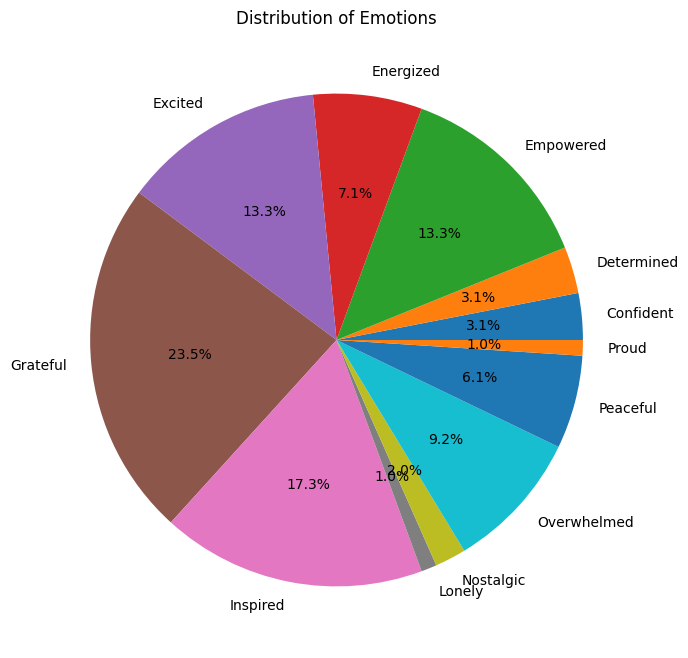

In [76]:
# Example usage
handle_input = input("Enter the Instagram handle: ")
get_instagram_info(handle_input)
